In [1]:
# Import standard libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Import routine
import sys
sys.path.append('../')
import FOLPSnu as FOLPS

#### Inputs

Set the *cosmological* and *nuisance parameters* for which you want to compute the redshift space power spectrum multipoles. Upload the corresponding linear power spectrum. You can also compute it using an Einstein-Boltzmann code like **CAMB**, **CLASS**, etc. In this example, we show the former case. 

Cosmological parameters:

Define a vector with the cosmological parameters, CosmoParams = [z_pk, omega_b, omega_cdm, omega_ncdm, h]

In [3]:
#omega_i = Omega_i h² 
omega_b = 0.0220684;        #baryons
omega_cdm = 0.116631;       #CDM
omega_ncdm = 0.00429461;    #massive neutrinos 
h = 0.6711;                 #h = H0/100
z_pk = 0.5;                 #evaluation redshift
CosmoParams = [z_pk, omega_b, omega_cdm, omega_ncdm, h]

Linear power spectrum:

In [4]:
inputpkT = np.loadtxt('pkl_cb_m04_z05.dat', unpack = True)

Nuisance parameters:

Define a vector with the nuisances parameters, NuisanParams = [b1, b2, bs2, b3nl, alpha0, alpha2, alpha4, ctilde, alphashot0, alphashot2, PshotP]

In [5]:
#bias parameters
b1 = 1.645;                 
b2 = -0.46;                 
bs2 = -4/7*(b1 - 1);        
b3nl = 32/315*(b1 - 1);  

#EFT parameters
alpha0 = 3;                 #units: [Mpc/h]^2
alpha2 = -28.9;             #units: [Mpc/h]^2
alpha4 = 0.0;               #units: [Mpc/h]^2
ctilde = 0.0;               #units: [Mpc/h]^4

#Stochatics parameters
alphashot0 = 0.08;          
alphashot2 = -8.1;          #units: [Mpc/h]^2      
PshotP = 1/0.0002118763;    #units: [Mpc/h]^3
NuisanParams = [b1, b2, bs2, b3nl, alpha0, alpha2, alpha4, ctilde, alphashot0, alphashot2, PshotP]

#### Computation of $M$ matrices 
**They do not depend on the cosmology**, so they are **computed only one time**. That is, the first time the code is called, it computes the $M$ matrices and stores them for the rest of the runs, which can be of the order of thousands in parameter estimations.

In [6]:
matrices = FOLPS.Matrices()

N = 128 sampling points
M matrices have been computed


#### Computation of the non-linear modulus and RSD multipoles
Here the code computes all the 1-loop contributions through the FFTLog formalism for both the wiggle and non-wiggle (also computed by the code) linear power spectra. Finally the code computes the EFT galaxy redshift space power spectrum, includes IR resummations and calculates the Legendre multipoles at the coordinates of evaluation, k_ev.

**Note:**
To include the Alcock-Paczyński (AP) test use 'AP = True' and include the fiducial dimensionless matter density parameter 'Omfid' within the modulus RSDmultipoles. 

In [7]:
nonlinear = FOLPS.NonLinear(inputpkT, CosmoParams, kminout=0.001, kmaxout=0.5, nk=120)

In [8]:
k_ev = np.logspace(np.log10(0.01), np.log10(0.3), num = 50) # array of k_ev in [h/Mpc]

In [9]:
kh, Pkl0, Pkl2, Pkl4 = FOLPS.RSDmultipoles(k_ev, NuisanParams, AP = False)

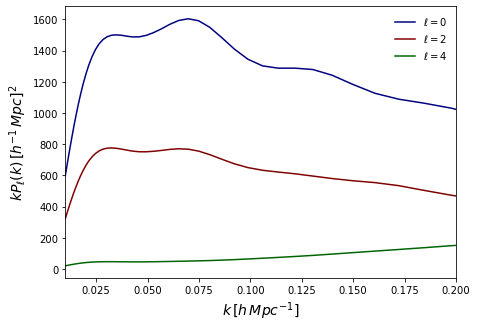

In [10]:
fig, axs = plt.subplots(figsize=(7,5))
axs.set_xlabel(r'$k \, [h\, Mpc^{-1}]$', fontsize =  14)
axs.set_ylabel(r'$k P_{\ell}(k) \, [h^{-1} \,  Mpc]^2$', fontsize =  14)

axs.plot(kh, kh * Pkl0, color = 'navy', ls='-', label=r'$\ell = 0$')
axs.plot(kh, kh * Pkl2, color = 'maroon', ls='-', label=r'$\ell = 2$')
axs.plot(kh, kh * Pkl4, color = 'darkgreen', ls='-', label=r'$\ell = 4$')

axs.set_xlim([kh[0], 0.2])
#axs.set_ylim([-200.0, 1800])

leg1 = axs.legend(loc = 'best');
leg1.get_frame().set_linewidth(0.0);

plt.show()

We stress that for different sets of *cosmological* and *nuisance parameters*, **we do not have to calculate the  𝑀  matrices again**. We can go directly to the computation of the non-linear modulus and RSD multipoles. The only piece that must be updated is the linear power spectrum. For example, let us consider a different set of cosmological and nuisance parameters: 

Cosmological parameters:

In [11]:
#omega_i = Omega_i h² 
omega_b = 0.0220684;        #baryons
omega_cdm = 0.120926;       #CDM
omega_ncdm = 0.000;         #massive neutrinos 
h = 0.6711;                 #h = H0/100
z_pk = 0.5;                 #evaluation redshift
CosmoParams = [z_pk, omega_b, omega_cdm, omega_ncdm, h]

Linear power spectrum:

In [12]:
inputpkT = np.loadtxt('pkl_cb_m00_z05.dat', unpack = True)

Nuisance parameters:

In [13]:
#bias parameters
b1 = 1.7167;      
b2 = -0.3546;      
bs2 = -4/7*(b1 - 1);          
b3nl = 32/315*(b1 - 1);     

#EFT parameters
alpha0 = -6.6225;           #units: [Mpc/h]^2
alpha2 = -16.3097;          #units: [Mpc/h]^2
alpha4 = -20.6673;          #units: [Mpc/h]^2
ctilde = 0.0;               #units: [Mpc/h]^4

#Stochatics parameters
alphashot0 = 0.0805;
alphashot2 = -4.3887;       #units: [Mpc/h]^2
PshotP = 1/0.00020792173;   #units: [Mpc/h]^3
NuisanParams = [b1, b2, bs2, b3nl, alpha0, alpha2, alpha4, ctilde, alphashot0, alphashot2, PshotP]

The non-linear terms and redshift space power spectrum multipoles for this new set of parameters are

In [14]:
nonlinear = FOLPS.NonLinear(inputpkT, CosmoParams)

kh, pkl0, pkl2, pkl4 = FOLPS.RSDmultipoles(k_ev, NuisanParams, AP = False)

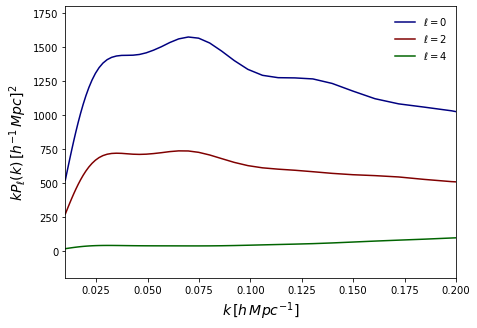

In [15]:
fig, axs = plt.subplots(figsize=(7,5))
axs.set_xlabel(r'$k \, [h\, Mpc^{-1}]$', fontsize =  14)
axs.set_ylabel(r'$k P_{\ell}(k) \, [h^{-1} \,  Mpc]^2$', fontsize =  14)

axs.plot(kh, kh * pkl0, color = 'navy', ls='-', label=r'$\ell = 0$')
axs.plot(kh, kh * pkl2, color = 'maroon', ls='-', label=r'$\ell = 2$')
axs.plot(kh, kh * pkl4, color = 'darkgreen', ls='-', label=r'$\ell = 4$')

axs.set_xlim([kh[0], 0.20])
axs.set_ylim([-200.0, 1800])

leg1 = axs.legend(loc = 'best');
leg1.get_frame().set_linewidth(0.0);

plt.show()

Some functions used to compute the redshift space power spectrum multiples can be obtained from *FOLPS.TableOut* (similarly the non-wiggle contributions can be extracted from FOLPS.TableOut_NW).

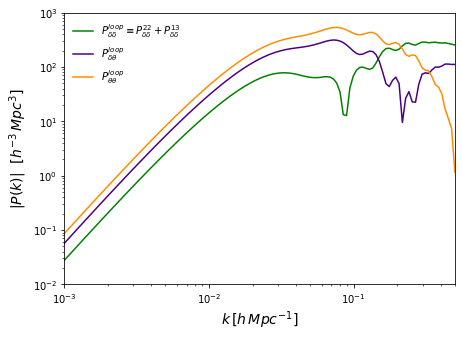

In [16]:
#Overdensity and velocity 1-loop contributions
krange = FOLPS.TableOut[0]; 
Ploop_dd = FOLPS.TableOut[3]; 
Ploop_dt = FOLPS.TableOut[4]; 
Ploop_tt = FOLPS.TableOut[5];


fig, axs = plt.subplots(figsize = (7, 5))

axs.loglog(krange, np.abs(Ploop_dd), color = 'green', ls='-',
           label=r'$P^{loop}_{\delta \delta} \equiv P^{22}_{\delta \delta} + P^{13}_{\delta \delta}$')
axs.loglog(krange, np.abs(Ploop_dt), color = 'indigo', ls='-',label=r'$P^{loop}_{\delta \theta}$')
axs.loglog(krange, np.abs(Ploop_tt), color = 'darkorange', ls='-',label=r'$P^{loop}_{\theta \theta}$')

axs.set_xlabel(r'$k \, [h\, Mpc^{-1}]$', fontsize =  14)
axs.set_ylabel(r'$|P(k)|$  $[h^{-3} \, Mpc^{3}]$', fontsize =  14)
axs.set_ylim([10**(-2), 10**(3)]);
axs.set_xlim([krange[0], krange[-1]]);

leg1 = axs.legend(loc = 'best');
leg1.get_frame().set_linewidth(0.0);

plt.show()

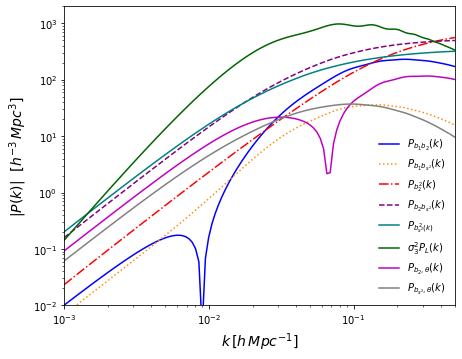

In [17]:
#Biasing 
#delta-delta
Pb1b2 = FOLPS.TableOut[6]; 
Pb1bs2 =FOLPS.TableOut[7]; 
Pb22 = FOLPS.TableOut[8];
Pb2bs2 = FOLPS.TableOut[9]; 
Pb2s2 = FOLPS.TableOut[10]; 
sigma23pkl = FOLPS.TableOut[11];

#delta-theta
Pb2t = FOLPS.TableOut[12]; 
Pbs2t = FOLPS.TableOut[13];


fig, axs = plt.subplots(figsize = (7, 5.5))

axs.loglog(krange, np.abs(Pb1b2), color = 'b', ls='-',label=r'$P_{b_1 b_2}(k)$')
axs.loglog(krange, np.abs(Pb1bs2), color = 'darkorange', ls=':',label=r'$P_{b_1 b_{s^2}}(k)$')
axs.loglog(krange, np.abs(Pb22), color = 'r', ls='-.',label=r'$P_{b^2_2}(k)$')
axs.loglog(krange, np.abs(Pb2bs2), color = 'purple', ls='--',label=r'$P_{b_2 b_{s^2}}(k)$')
axs.loglog(krange, np.abs(Pb2s2), color = 'teal', ls='-',label=r'$P_{b^2_{s^2}(k)}$')
axs.loglog(krange, np.abs(sigma23pkl), color = 'darkgreen', ls='-',label=r'$\sigma^2_3 P_L(k)$')
axs.loglog(krange, np.abs(Pb2t), color = 'm', ls='-',label=r'$P_{b_2, \theta}(k)$')
axs.loglog(krange, np.abs(Pbs2t), color = 'grey', ls='-',label=r'$P_{b_{s^2}, \theta}(k)$')

axs.set_xlabel(r'$k \, [h\, Mpc^{-1}]$', fontsize =  14)
axs.set_ylabel(r'$|P(k)|$  $[h^{-3} \, Mpc^{3}]$', fontsize =  14)
axs.set_ylim([10**(-2), 2*10**3]);
axs.set_xlim([krange[0], krange[-1]]);

leg1 = axs.legend(loc = 'best');
leg1.get_frame().set_linewidth(0.0);

plt.show()

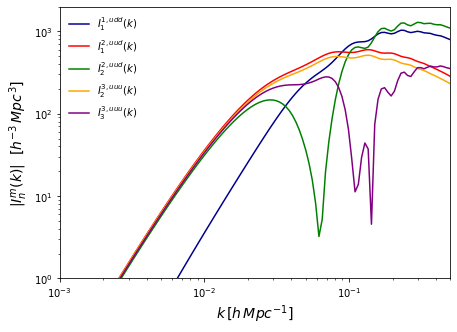

In [18]:
#A-function
I1udd_1 = FOLPS.TableOut[14]; 
I2uud_1 = FOLPS.TableOut[15]; 
I2uud_2 = FOLPS.TableOut[16]; 
I3uuu_2 = FOLPS.TableOut[17]; 
I3uuu_3 = FOLPS.TableOut[18];


fig, axs = plt.subplots(figsize = (7,5))

axs.loglog(krange, np.abs(I1udd_1), color = 'darkblue', ls='-',label=r'$I^{1,udd}_{1}(k)$')
axs.loglog(krange, np.abs(I2uud_1), color = 'red', ls='-',label=r'$I^{2,uud}_{1}(k)$')
axs.loglog(krange, np.abs(I2uud_2), color = 'g', ls='-',label=r'$I^{2,uud}_{2}(k)$')
axs.loglog(krange, np.abs(I3uuu_2), color = 'orange', ls='-',label=r'$I^{3,uuu}_{2}(k)$')
axs.loglog(krange, np.abs(I3uuu_3), color = 'purple', ls='-',label=r'$I^{3,uuu}_{3}(k)$')

axs.set_xlabel(r'$k \, [h\, Mpc^{-1}]$', fontsize =  14)
axs.set_ylabel(r'$|I^{m}_n(k)|$  $[h^{-3} \, Mpc^{3}]$', fontsize =  14)
axs.set_ylim([10**(0), 2*10**3]);
axs.set_xlim([krange[0], krange[-1]]);

leg1 = axs.legend(loc = 'best');
leg1.get_frame().set_linewidth(0.0);

plt.show()

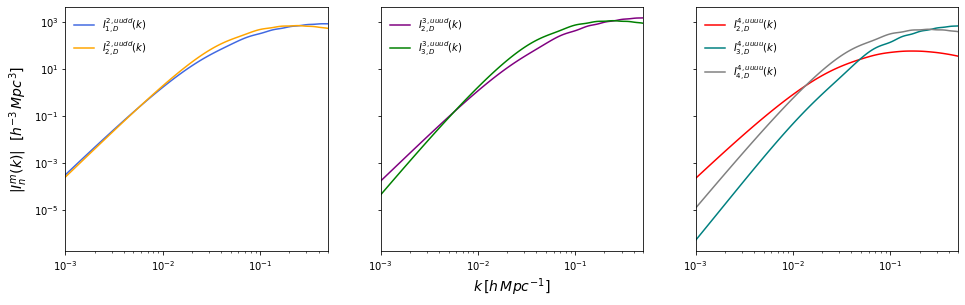

In [19]:
#D-function
I2uudd_1D = FOLPS.TableOut[19]; 
I2uudd_2D = FOLPS.TableOut[20]; 
I3uuud_2D = FOLPS.TableOut[21]; 
I3uuud_3D = FOLPS.TableOut[22]; 
I4uuuu_2D = FOLPS.TableOut[23]; 
I4uuuu_3D = FOLPS.TableOut[24] 
I4uuuu_4D = FOLPS.TableOut[25];


fig, axs = plt.subplots(1, 3, figsize = (16,4.5),  sharex=True, sharey=True)

axs[0].loglog(krange, np.abs(I2uudd_1D), color = 'royalblue', ls='-',label=r'$I^{2,uudd}_{1,D}(k)$')
axs[0].loglog(krange, np.abs(I2uudd_2D), color = 'orange', ls='-',label=r'$I^{2,uudd}_{2,D}(k)$')

axs[1].loglog(krange, np.abs(I3uuud_2D), color = 'purple', ls='-',label=r'$I^{3,uuud}_{2,D}(k)$')
axs[1].loglog(krange, np.abs(I3uuud_3D), color = 'green', ls='-',label=r'$I^{3,uuud}_{3,D}(k)$')

axs[2].loglog(krange, np.abs(I4uuuu_2D), color = 'red', ls='-',label=r'$I^{4,uuuu}_{2,D}(k)$')
axs[2].loglog(krange, np.abs(I4uuuu_3D), color = 'teal', ls='-',label=r'$I^{4,uuuu}_{3,D}(k)$')
axs[2].loglog(krange, np.abs(I4uuuu_4D), color = 'gray', ls='-',label=r'$I^{4,uuuu}_{4,D}(k)$')

axs[1].set_xlabel(r'$k \, [h\, Mpc^{-1}]$', fontsize =  14)
axs[0].set_ylabel(r'$|I^{m}_n(k)|$  $[h^{-3} \, Mpc^{3}]$', fontsize =  14)
#axs.set_ylim([10**(0), 2*10**3]);
axs[0].set_xlim([krange[0], krange[-1]]);

leg1 = axs[0].legend(loc = 'best');
leg1.get_frame().set_linewidth(0.0);

leg2 = axs[1].legend(loc = 'best');
leg2.get_frame().set_linewidth(0.0);

leg3 = axs[2].legend(loc = 'best');
leg3.get_frame().set_linewidth(0.0);

plt.show()